Funcion numero de componentes conectados: Esta funcion simplemente nos mostrara el valor de los componenetes
conectados presentes en la red con la funcion de networkx "number_connected_components(G)".

In [25]:
def num_componentes_conectados(red):
    G = nx.number_connected_components(red)
    return(G)

Funcion de proporcion de componente gigante: Simplemente nos mandara el componente con el que esta conectado un 
determinado nodo y a demas calculamos dicha proporcion dividiendo la cantidad de nodos del componente obtenido entre 
la cantidad de nodos total u original de la red completa.

In [2]:
def prop_componente_gigante(red,n,m):
    G = nx.node_connected_component(red,n)
    print(G)
    
    proporcion = len(G)/m
    
    print('Proporcion:',proporcion)

Funcion de error: Esta funcion unicamente se encargara de eliminar determinados nodos de la red.

In [14]:
def error(red,n,m,i):
    red.remove_node(n)
    dibuja_red(red)
    num_componentes_conectados(red)
    prop_componente_gigante(red,20,m)
    i = i+1
    return(i)

Funciones para calcular los grados de entrada y sus graficas

In [4]:
def calcula_grados_entrada(d_grafica):
    grado_e = {}

    for i in d_grafica:
        up = {i:len(d_grafica[i])}   
        grado_e.update(up)
    return(grado_e)

In [5]:
def dist_grados_entrada(grado_e):
    distr = {}
    lst_temp2 = list()

    for values in grado_e.values():      
        lst_temp2.append(values)
        lst_temp2.sort() 
    
    for i in lst_temp2: 
        llave = lst_temp2.count(i) 
        up2 = {i:llave} #imprimira los grandos de entrada como {grado de entrada:cantidad de nodos}
        distr.update(up2)
    print(distr)
    return(distr)

In [12]:
def grafica_distr(distr,distr2):
    x = list()
    y = list()
    x2 = list()
    y2 = list()

    for i in distr:
        x.append(distr[i])
        x2.append(distr2[i])
        y.append(i)
        y2.append(i)
    plt.figure(figsize = (4,4))
    plt.plot(x,x2,y,y2)
    plt.title('Distribución de Grados de Entrada')
    plt.xlabel('grado nodal')
    plt.ylabel('numero de nodos')
    plt.show()

Funcion numero de componenetes conectados vs numero de nodos eliminados

In [44]:
def comp_conect_vs_nodos_elim(G,nodos_e,G2,nodos_e2): #Nodos_e = nodos eliminados
    componentes = num_componentes_conectados(G)
    componentes2 = num_componentes_conectados(G2)
    listanodo = list()
    listanodo2 = list()
    for i in range(1,nodos_e+1):
        listanodo.append(i)
        listanodo2.append(i)
    plt.figure(figsize = (6,6))
    plt.plot(componentes,componentes2,listanodo,listanodo2)
    plt.show()

Funcion dibuja red: Solamente la ocupamos para que se armen las redes con networkx

In [7]:
def dibuja_red(red):
    G = nx.Graph(red)
    plt.figure(figsize = (6,6))
    plt.title('Red')
    nx.draw(G, with_labels=True)
    plt.show()
    return G

<IPython.core.display.Javascript object>


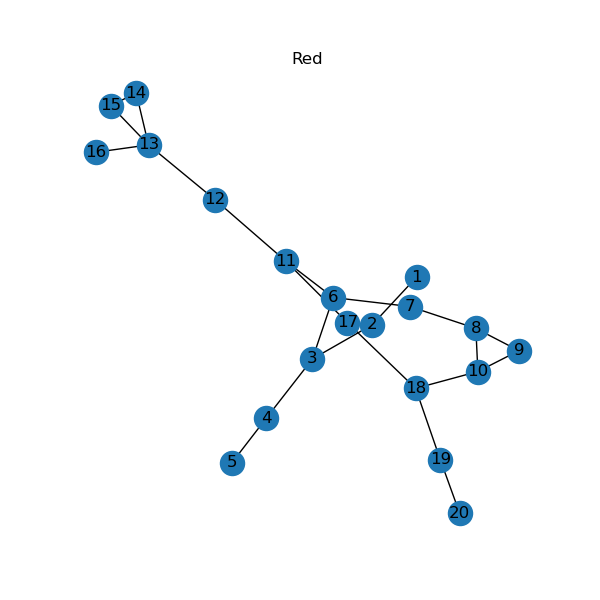

1
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Proporcion: 1.0


<IPython.core.display.Javascript object>


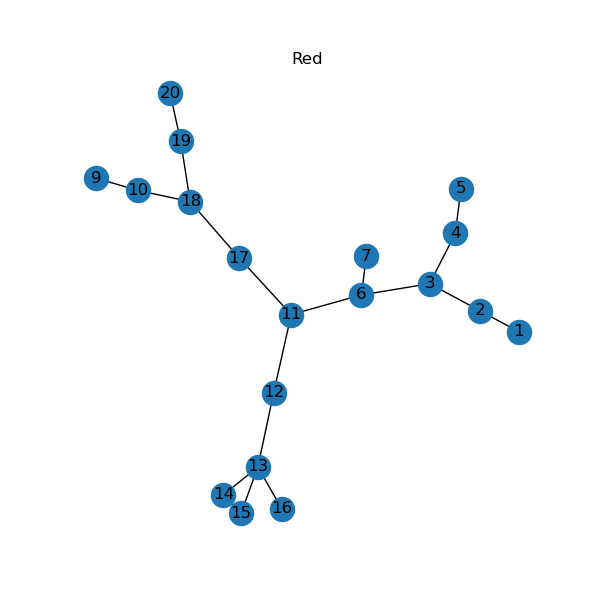

{1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Proporcion: 0.95


<IPython.core.display.Javascript object>


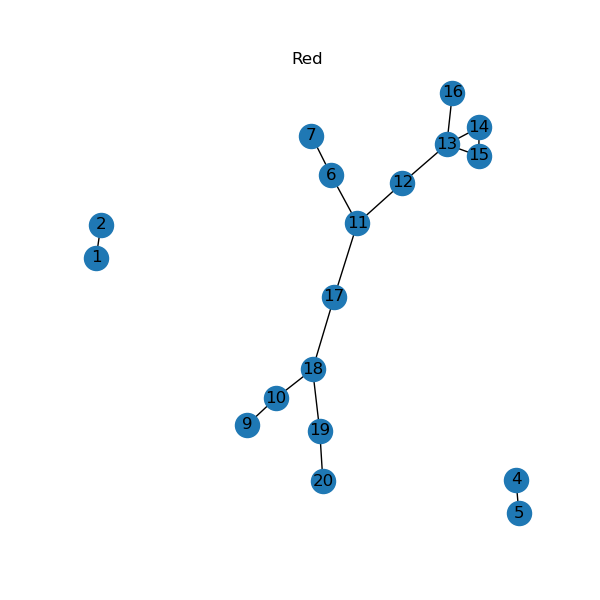

{6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Proporcion: 0.7


<IPython.core.display.Javascript object>


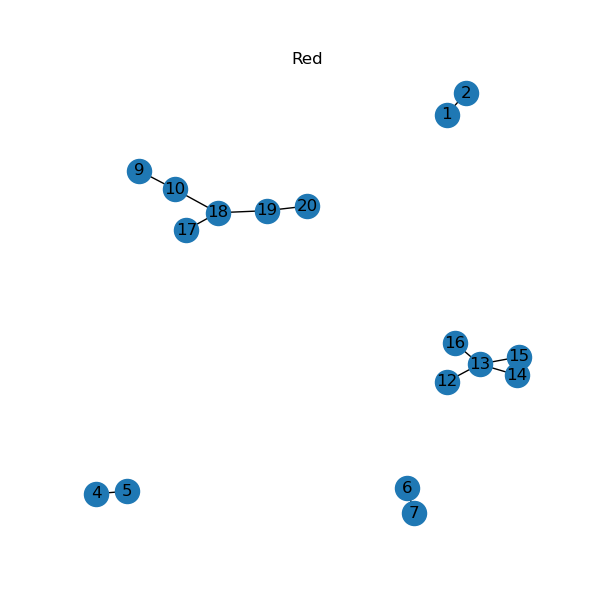

{9, 10, 17, 18, 19, 20}
Proporcion: 0.3


In [27]:
%matplotlib notebook
import networkx as nx
import matplotlib.pyplot as plt

red = {1:{2}, 2:{3}, 3:{2,4,6}, 4:{3,5}, 5:{4}, 6:{3,7,11}, 7:{6,8}, 8:{7,9,10}, 9:{8,10}, 10:{8,9,18}, 11:{6,12,17}, 
       12:{11,13}, 13:{12,14,15,16}, 14:{13,15}, 15:{13,14}, 16:{13}, 17:{11,18}, 18:{10,17,19}, 19:{18,20}, 20:{19}}
m = len(red)
i=0

G = dibuja_red(red)
distr = G
N = num_componentes_conectados(G)
print(N)
prop_componente_gigante(G,20,m)
i = error(G,8,m,i)
i = error(G,3,m,i)
i = error(G,11,m,i)

Procedemos a hacer lo anteriror pero con la red donde los nodos en promedio tienen grado 4

<IPython.core.display.Javascript object>


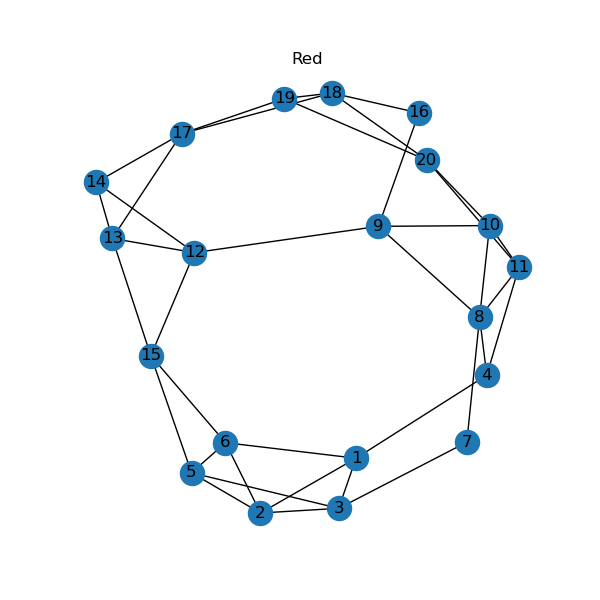

1
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Proporcion: 1.0


<IPython.core.display.Javascript object>


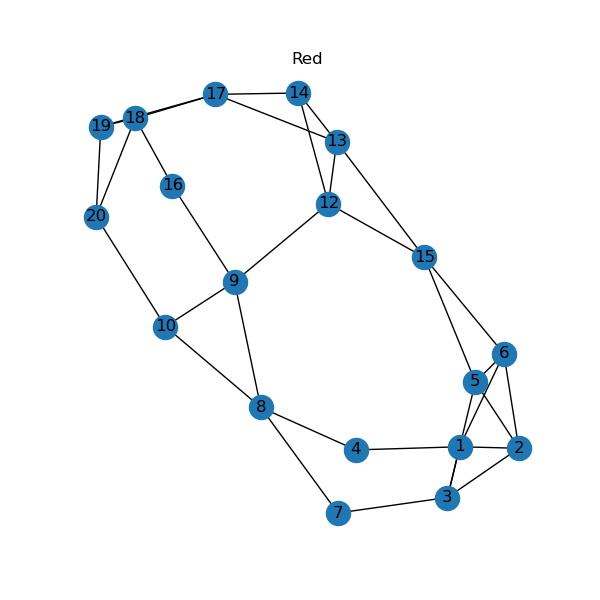

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Proporcion: 0.95


<IPython.core.display.Javascript object>


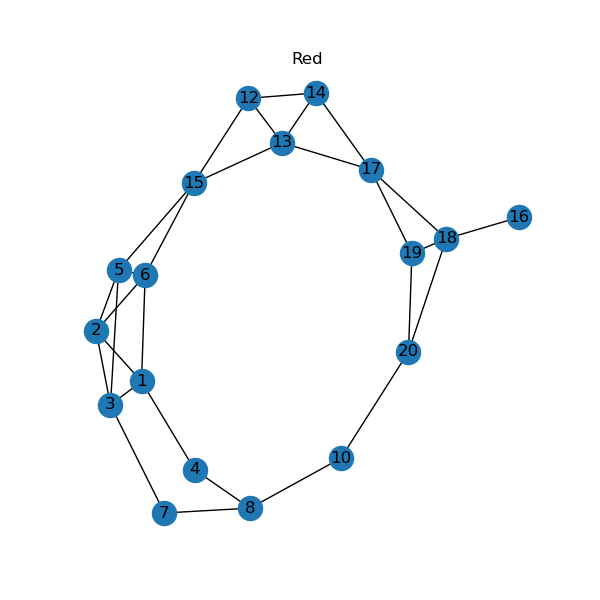

{1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Proporcion: 0.9


<IPython.core.display.Javascript object>


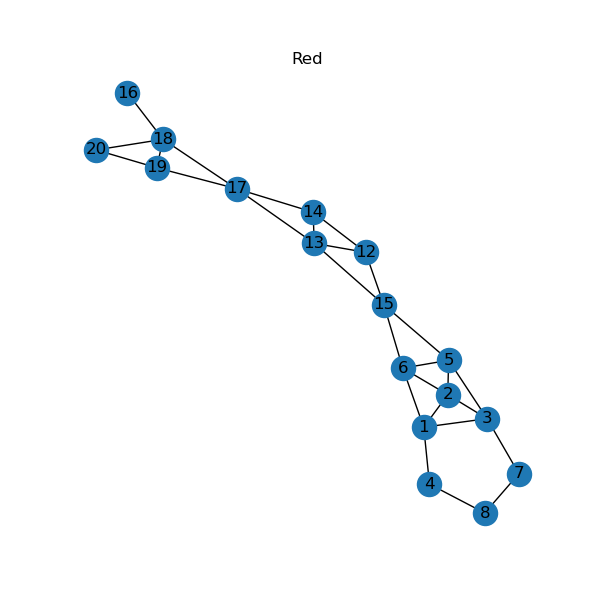

{1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Proporcion: 0.85


In [29]:
red2 = {1:{2,3,4}, 2:{1,3,5,6}, 3:{1,2,5,7}, 4:{1,8,11}, 5:{2,3,6,15}, 6:{1,5,15}, 7:{3,8}, 8:{4,7,9,10,11}, 9:{8,10,12,16},
        10:{8,9,11,20}, 11:{4,8,10,20}, 12:{9,13,14,15}, 13:{12,14,15,17}, 14:{12,13,17}, 15:{5,6,12,13}, 16:{9,18},
        17:{13,14,18,19}, 18:{16,17,19,20}, 19:{17,18,20}, 20:{18,19,10,11}} #red con promedio de grado 4 por nodo
m2 = len(red)
i2 = 0

G2 = dibuja_red(red2)
distr2 = G2
N = num_componentes_conectados(G2)
print(N)
prop_componente_gigante(G2,20,m2)
i2 = error(G2,11,m2,i2)
i2 = error(G2,9,m2,i2)
i2 = error(G2,10,m2,i2)

Procedemos a calcular los grados de entrada y sus respectivas graficas

In [30]:
grado1_e = calcula_grados_entrada(distr)
distrgraf1 = dist_grados_entrada(grado1_e)

grado2_e = calcula_grados_entrada(distr2)
distrgraf2 = dist_grados_entrada(grado2_e)

{1: 11, 2: 4, 3: 1, 4: 1}
{1: 1, 2: 4, 3: 3, 4: 9}


<IPython.core.display.Javascript object>


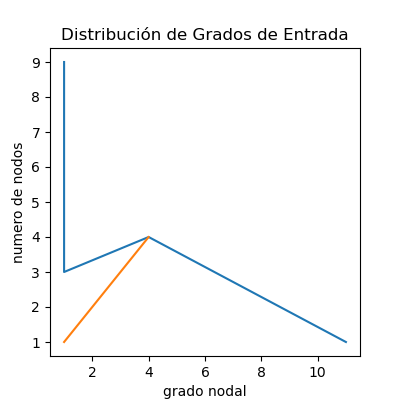

In [46]:
grafica_distr(distrgraf1,distrgraf2)

<IPython.core.display.Javascript object>


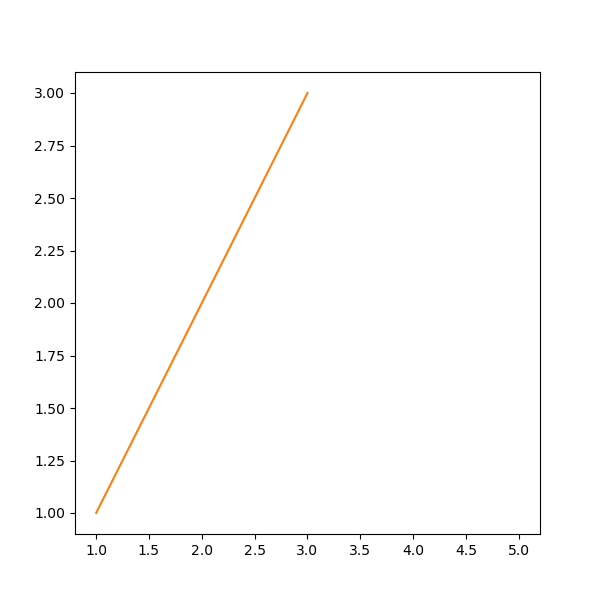

In [47]:
comp_conect_vs_nodos_elim(G,i,G2,i2)